In [1]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

<function matplotlib.pyplot.show(close=None, block=None)>

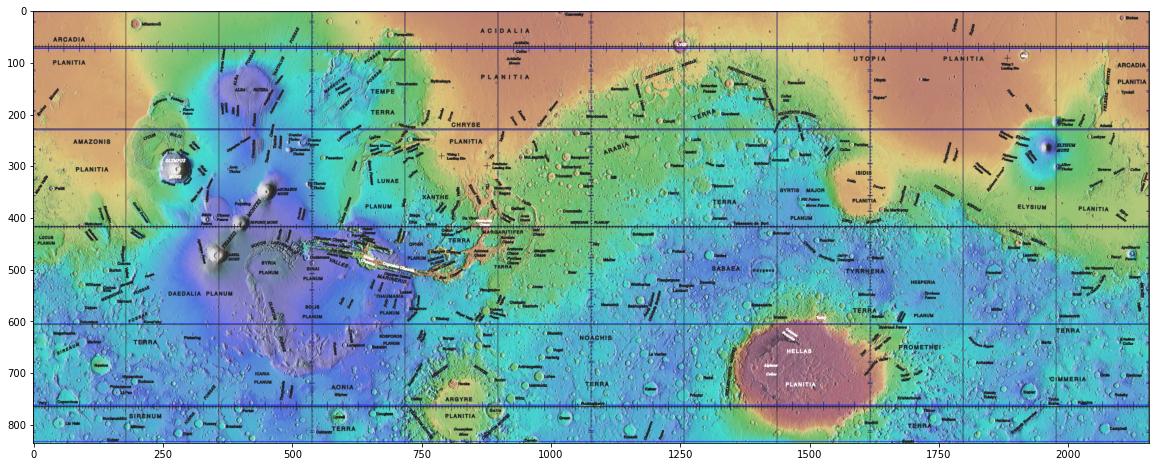

In [15]:
img = cv2.imread('map.PNG')
img_crop = img[ 31:-23, 38:-35]
plt.imshow(img_crop)
plt.show

In [17]:
#Anzahl der Unterteilungen pro Seite, also Wurzel aus Anzahl der Marspieces
#zum rumspielen am besten kleine zahlen nehmen, plotten dauert sonst ewig.

n = 20 

dy = int(img_crop.shape[0]/n)
dx = int(img_crop.shape[1]/n)

# durch die Rundung der dy,dx-Inkremente auf int bleiben am Ende ein paar Pixel übrig
# hier als residuals berechnet, vielleicht später nötig für Darstellung.
# auf das Array mit den Daten haben die residuals aber keinen EInfluss.

resy = img_crop.shape[0]/n - int(img_crop.shape[0]/n)
resx = img_crop.shape[1]/n - int(img_crop.shape[1]/n)


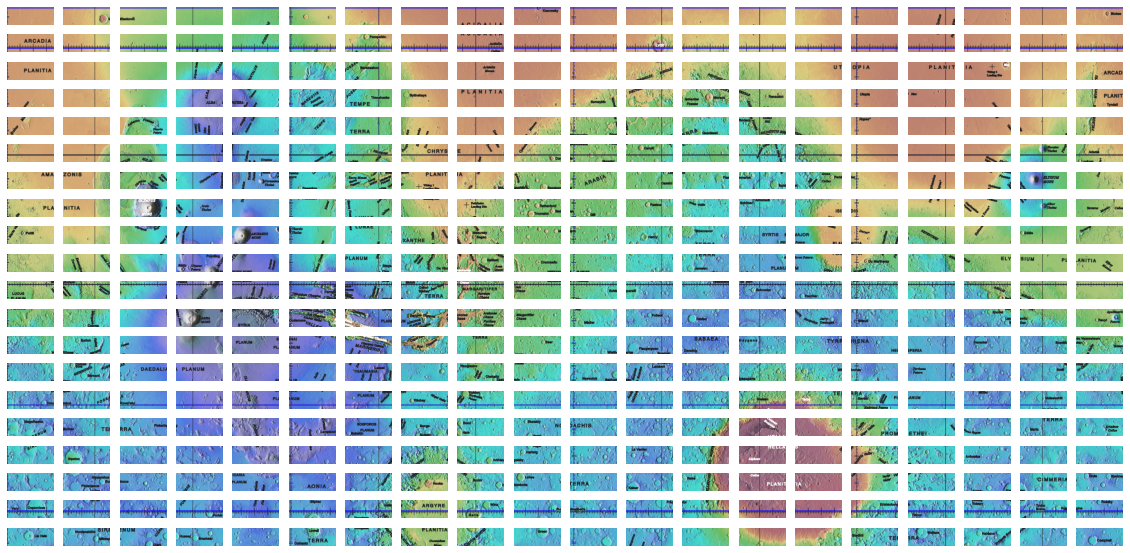

In [8]:
for x in range(0,n):
    for y in range(0,n):
        img = img_crop[(y*dy):((y+1)*dy), (x*dx):((x+1)*dx)]
        plt.subplot(n,n,x+n*y+1)
        #plt.title('map piece '+str(x+1)+', '+str(y+1), fontsize=6)
        plt.axis('off')
        plt.imshow(img)

In [29]:
"""def dd2dms(dd):
   is_positive = dd >= 0
   dd = abs(dd)
   minutes,seconds = divmod(dd*3600,60)
   degrees,minutes = divmod(minutes,60)
   degrees = degrees if is_positive else -degrees
   return (degrees,minutes,seconds)"""

In [10]:
# Funktion die grad+dezimal zu grad+minuten+sekunden macht

def dd2dms(dd):
   is_positive = dd >= 0
   dd = abs(dd)
   minutes,seconds = divmod(dd*3600,60)
   degrees,minutes = divmod(minutes,60)
   degrees = degrees if is_positive else -degrees
   return (str(degrees)+'° '+str(minutes)+'′ '+str(seconds)+'"')

In [16]:
#oben links:   57°N, 180°W
#unten rechts: 57°S, 180°O
#unten links:  57°S, 180°W

maparray = np.ndarray(shape=(n,n,5),dtype=object)

north = 57
#south = -57
west = 180
#east = -180

# berechne Koordinateninkrement in grad+dezimal, sowohl north-south-Richtung als auch west-east
d_ns = (north-south)/n
d_we = (west-east)/n

#weise Koordinaten der Eckpunkte dem array zu
#südlicher BReitengrad wird als negativer nördlicher ausgegeben, östlicher Längengrad als neg. west.

for x in range(0,n):
    for y in range(0,n):
        topleft_long = dd2dms(north-y*d_ns)
        topleft_lat = dd2dms(west-x*d_we)
        bottomleft_long = dd2dms(north-(y+1)*d_ns)
        bottomleft_lat = dd2dms(west-x*d_we)
        bottomright_long = dd2dms(north-(y+1)*d_ns)
        bottomright_lat = dd2dms(west-(x+1)*d_we)        
        topright_long = dd2dms(north-y*d_ns)
        topright_lat = dd2dms(west-(x+1)*d_we)
        number = x+n*y+1
        maparray[y,x,0] = number
        maparray[y,x,1] = str(topleft_long)+' N, '+str(topleft_lat)+' W'
        maparray[y,x,2] = str(bottomleft_long)+' N, '+str(bottomleft_lat)+' W'
        maparray[y,x,3] = str(bottomright_long)+' N, '+str(bottomright_lat)+' W'
        maparray[y,x,4] = str(topright_long)+' N, '+str(topright_lat)+' W'
        
print(maparray[:,:,0])

[[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
 [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60]
 [61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80]
 [81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100]
 [101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
  119 120]
 [121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
  139 140]
 [141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
  159 160]
 [161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
  179 180]
 [181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
  199 200]
 [201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
  219 220]
 [221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
  239 240]
 [241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
  259 260]
 [261 262 263